In [553]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [554]:
#Loading The DataSet
df = pd.read_csv("Processed_Flipdata - Processed_Flipdata.csv")
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [555]:
#Checking the Shape of the dataframe
df.shape

(541, 12)

In [556]:
#Checking Null Values in the Data Frame
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [557]:
#Dropping Unwanted Columns from the dataframe like Unmaned: 0
df=df.drop(columns='Unnamed: 0')
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [ ]:
#Here we see that Data Frame needs to be edited: 'Memory' should be renamed as 'Memory(Bit)', 'RAM' as 'RAM(GB)', 'Battery' as 'Battery(mAH)',
#The Features 'Front Camera' and 'Rear Camera' as 'Front Camera(MP)' and 'Rear Camera(MP)' and its row value to be split and MP unitto be removed 
# So that itis converted to Numerical Feature
# 'Prize' to be renamed as 'Price(Rs.)'

In [371]:
df.shape

(541, 11)

In [558]:
#So we find that there are 541 rows and 11 columns or features. So per previous line doing the modifications
MP=df['Rear Camera'].str.split("M",expand=True)
MP1=df['Front Camera'].str.split("M",expand=True)

In [559]:
#user_df.insert(loc = 1, column = 'first_name', value = user_names[0])
df.insert(loc=5,column= "Rear Camera MP", value = MP[0])
df.insert(loc=6,column= "Front Camera MP", value = MP1[0])

In [560]:
#data3['Title'] = data3['Title'].astype(str).astype(int)
df["Rear Camera MP"] = df["Rear Camera MP"].astype(str).astype(int)
df["Front Camera MP"] = df["Front Camera MP"].astype(str).astype(int)

In [561]:
df=df.drop("Front Camera",axis=1)
df=df.drop("Rear Camera",axis=1)

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery_         541 non-null    int64  
 5   Rear Camera MP   541 non-null    int32  
 6   Front Camera MP  541 non-null    int32  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor_       541 non-null    object 
 10  Prize            541 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 42.4+ KB


In [563]:
#Renaming Column Prize to Price
df.rename(columns={"Prize":"Price"},inplace=True)

In [564]:
#Replacing Comma from the Price Value and converting it to int type
df["Price"]=df["Price"].str.replace(",","").astype(int)

In [565]:
df["Price"]

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Price, Length: 541, dtype: int32

In [380]:
#Model=df["Model"].str.split(" ",n=1,expand=True)

In [381]:
#df.insert(loc=0,column="Mobile Brand",value=Model[0])
#df.insert(loc=1, column="Model Name", value=Model[1])

In [382]:
#df.drop("Model",axis=1,inplace=True)

In [566]:
df.head(6)

,Model,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999


In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery_         541 non-null    int64  
 5   Rear Camera MP   541 non-null    int32  
 6   Front Camera MP  541 non-null    int32  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor_       541 non-null    object 
 10  Price            541 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(3)
memory usage: 40.3+ KB


In [568]:
df.describe()

,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000


In [586]:
df_numerical=df.select_dtypes(include=['int32','int64','float64'])
df_numerical.head()

,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Price
0,64,4,6000,13,5,1,16.76,8.895493
1,64,4,6000,13,5,1,16.76,8.895493
2,128,8,5000,50,16,0,16.64,9.392579
3,32,2,5000,8,5,0,16.56,8.639234
4,128,8,5000,50,5,1,16.76,9.104869


In [587]:
df_numerical.shape

(541, 8)

In [571]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Model,Colour,Processor_
0,Infinix SMART 7,Night Black,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,G37


In [572]:
df_categorical.shape

(541, 3)

In [573]:
df_categorical["Model"]

0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object

In [574]:
Model_name_missing=np.where(df["Model"].isnull())[0]
Model_name_missing

array([], dtype=int64)

In [392]:
#df.loc[116:116]

,Mobile Brand,Model Name,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Price
116,micromax,None,OMG Black,128,4,1000,0,0,0,4.5,SC6531E,1422


In [393]:
#df["Model Name"]=df["Model Name"].fillna("Not Available")

In [394]:
#df.loc[181:182]

,Mobile Brand,Model Name,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Price
181,micromax,Not Available,Light Silver,32,3,2550,0,0,0,4.5,SC6531E,1375
182,micromax1,Not Available,Light Silver,32,3,800,0,0,0,4.5,SC6531E,1599


In [395]:
#df.loc[250:250]

,Mobile Brand,Model Name,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Price
250,micromax,Not Available,Lake Blue,64,4,1500,0,0,0,6.1,Mediatek MT6261D,1199


In [335]:
#df.loc[250:250]

,Mobile Brand,Model Name,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Price
250,micromax,Not Available,Lake Blue,64,4,1500,0,0,0,6.1,Mediatek MT6261D,1199


<Axes: >

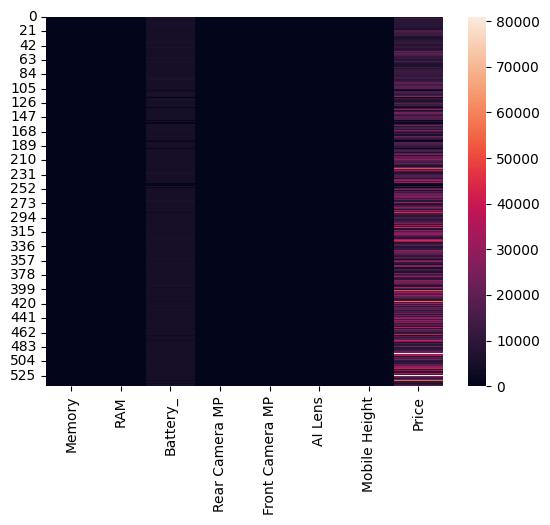

In [575]:
sns.heatmap(df_numerical)

In [397]:
#df["Model Name"].isnull().sum()

0

In [576]:
#Here we are finding the unique values of different features and their total counts:
counter=1
for i in df:
    print(counter,":","The value counts are :",df[i].value_counts())
    print("The Count of Unique Values of ",i,"is  :",df[i].nunique())
    counter=counter+1

1 : The value counts are : Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64
The Count of Unique Values of  Model is  : 187
2 : The value counts are : Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64
The Count of Unique Values of  Colour is  : 275
3 : The value counts are : Memory
128    259
64     169
256     55
32      52
16       6
Name: count, dtype: int64
The Count of Unique Values of  Memory is  : 5
4 : The value counts are : RAM
4    186
8    157
6    121
3     40
2   

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery_         541 non-null    int64  
 5   Rear Camera MP   541 non-null    int32  
 6   Front Camera MP  541 non-null    int32  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor_       541 non-null    object 
 10  Price            541 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(3)
memory usage: 40.3+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\3002374474.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], fit=norm)


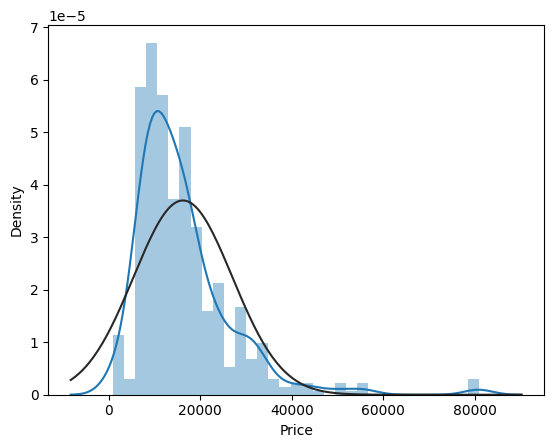

In [579]:
# Let us first visualize the spread of Target Variable 'Price'
from scipy.stats import norm
sns.distplot(df['Price'], fit=norm)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\1843440897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], fit=norm)


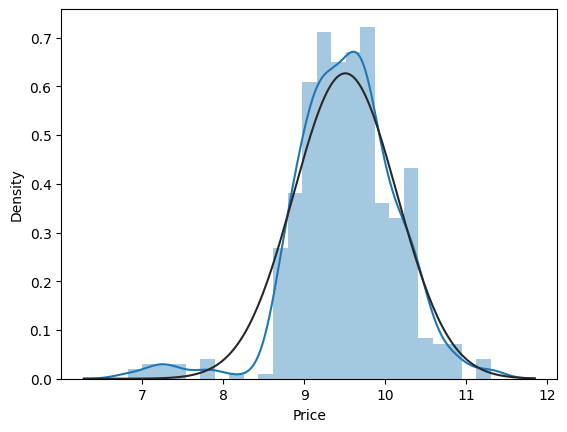

In [580]:
#Doing the log normal distribution for the right skewed data
df['Price'] = np.log(df['Price'])
sns.distplot(df['Price'], fit=norm)
plt.show()

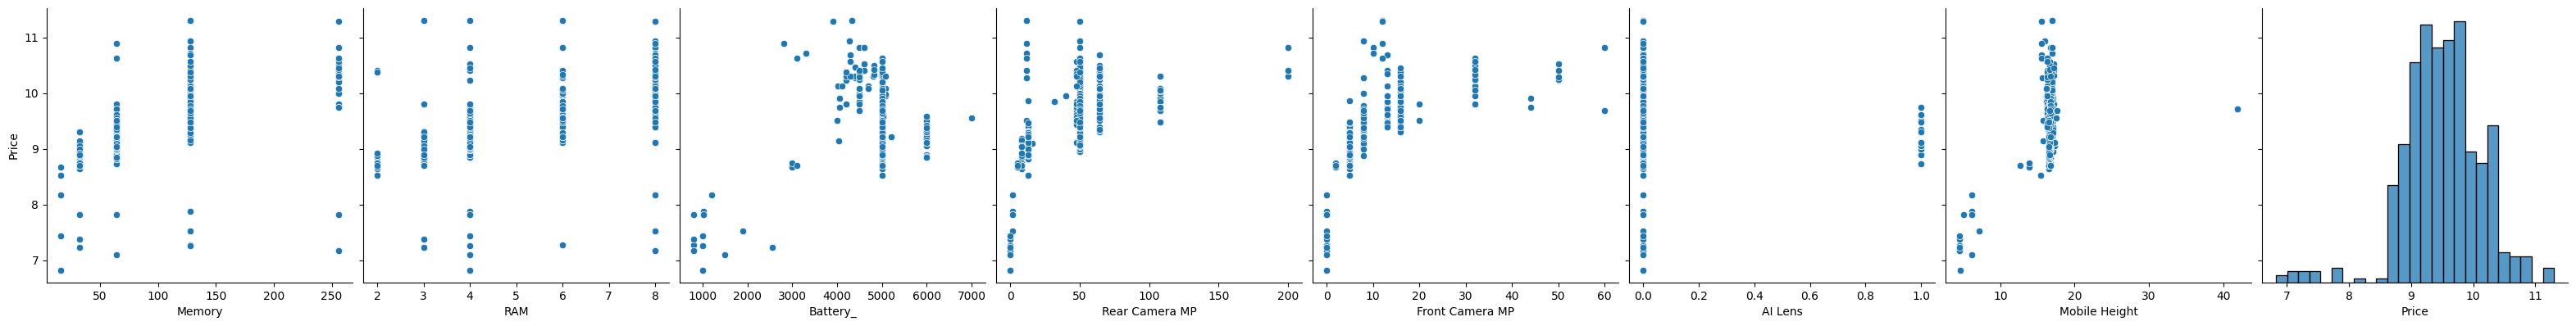

In [581]:
#EDA Part (Exploratory Data Analysis)
sns.pairplot(df, y_vars='Price',height=4, aspect=1, kind='scatter')

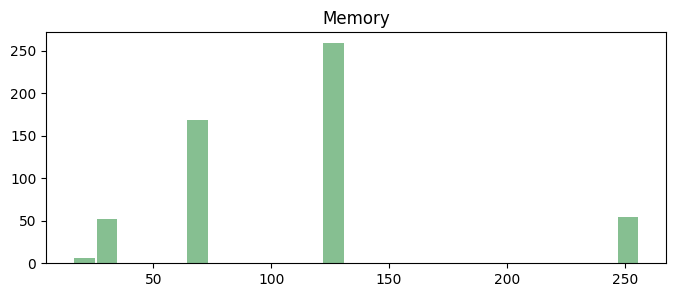

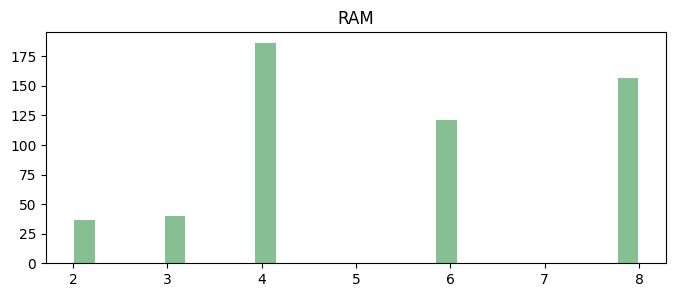

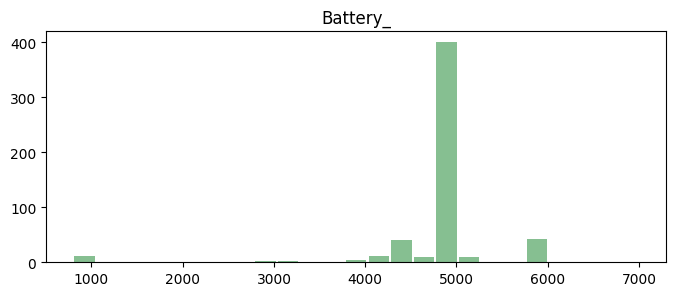

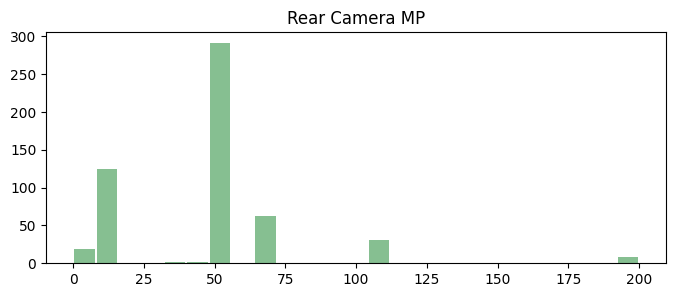

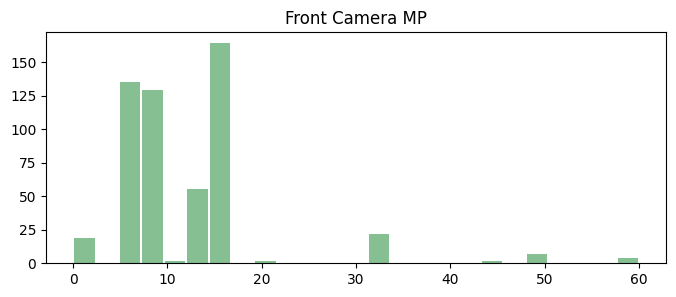

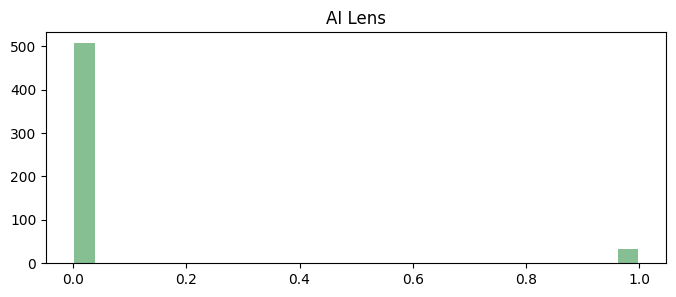

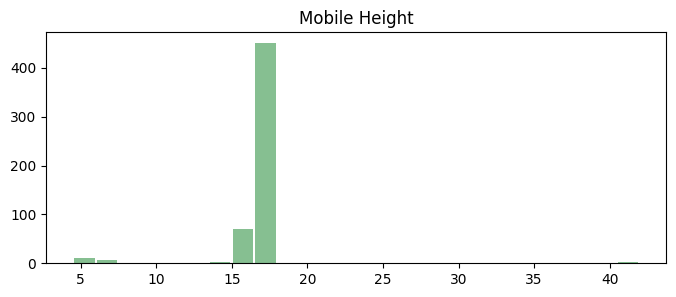

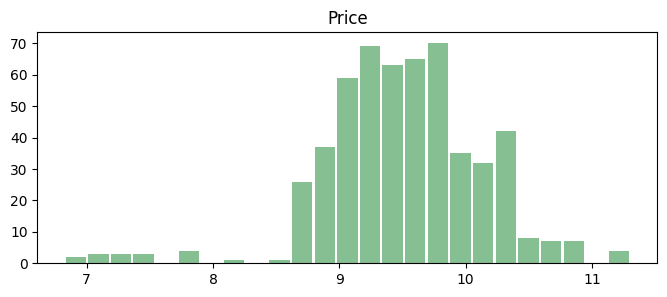

In [582]:
for feature in df_numerical:
    ax = df.hist(column=feature, bins=25, grid=False, figsize=(8,3), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: >

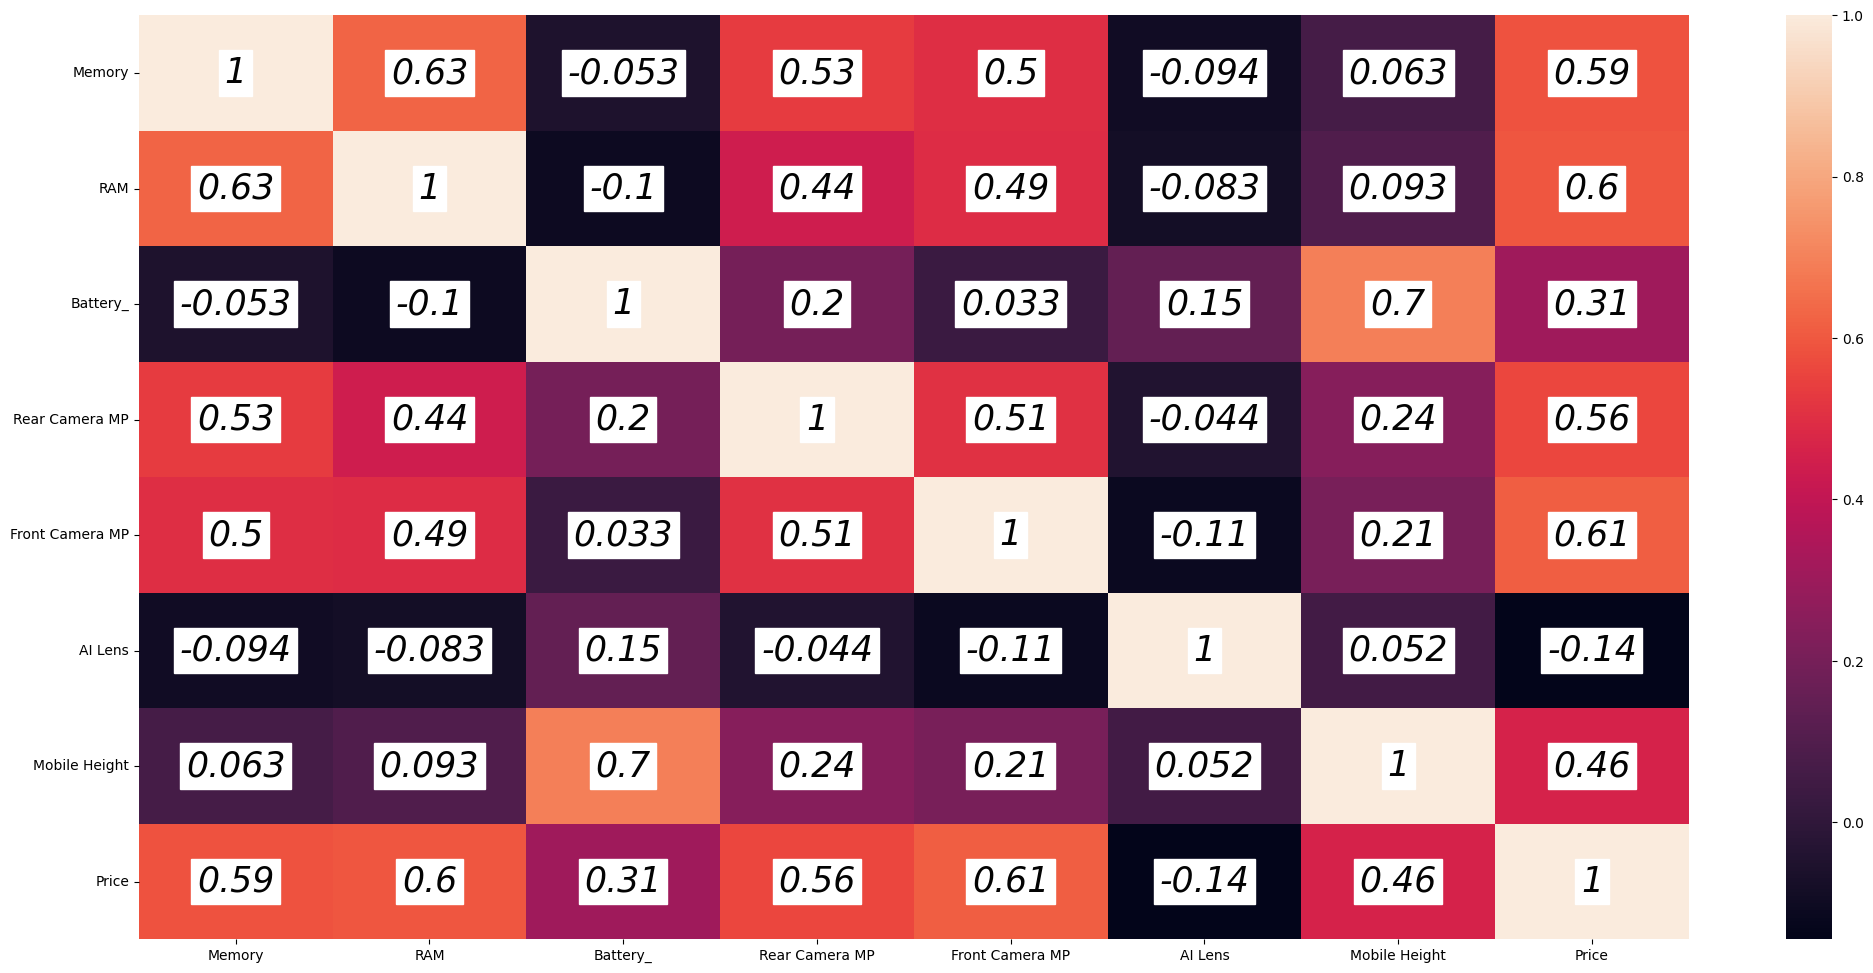

In [583]:
#Finding Correlation and checking the same by visualisation
plt.figure(figsize=(25, 12))
annot_kws={"fontsize":25,
           "fontstyle":'italic',
           "color":"k",
           "alpha":0.99,
           "rotation":"horizontal",
           "verticalalignment":"center",
           "backgroundcolor":"w"}
sns.heatmap(df.corr(numeric_only=True),
            annot=True,annot_kws=annot_kws)

In [584]:
df_numerical.columns

Index(['Memory', 'RAM', 'Battery_', 'Rear Camera MP', 'Front Camera MP',
       'AI Lens', 'Mobile Height', 'Price'],
      dtype='object')

In [464]:
strong_corr=['Memory', 'RAM', 'Battery_', 'Rear Camera MP', 'Front Camera MP', 'Mobile Height', 'Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


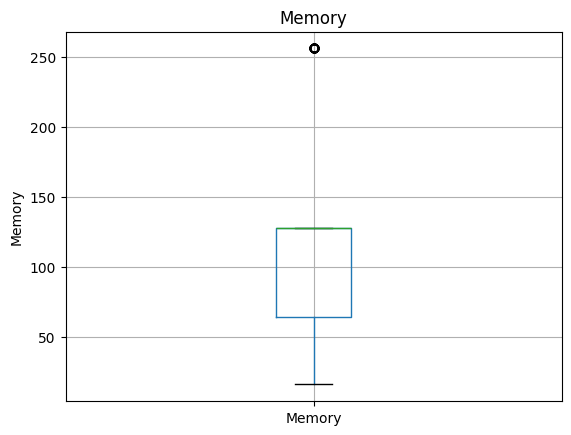

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


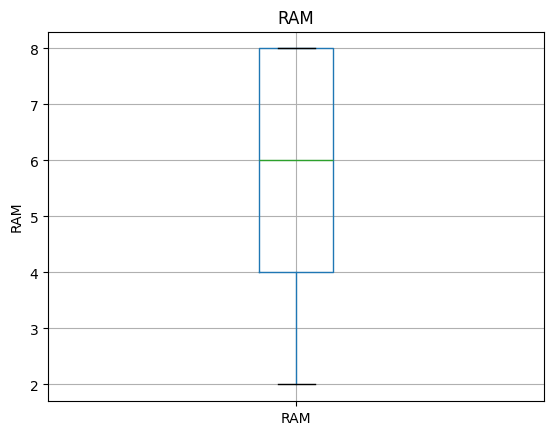

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


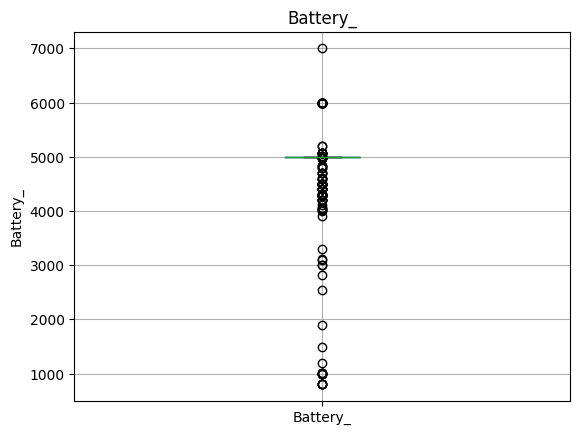

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


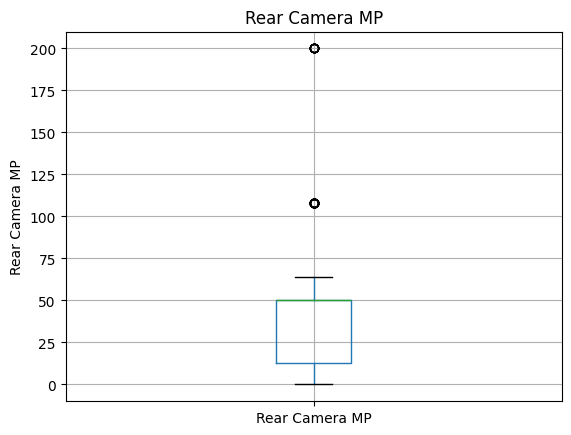

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


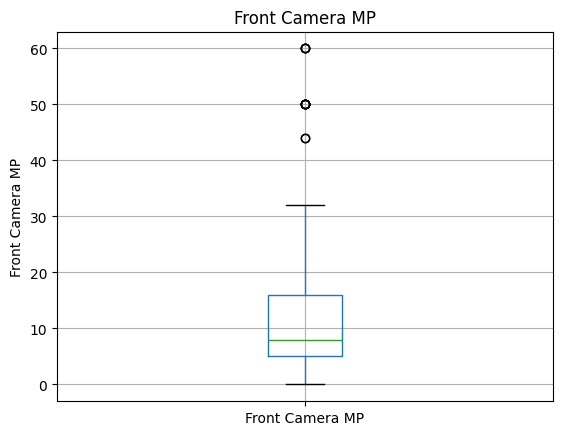

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


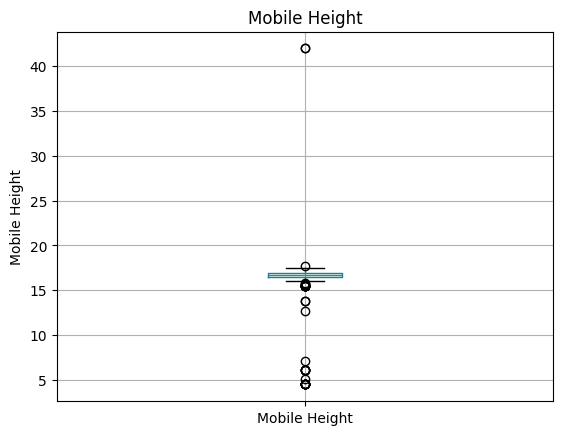

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\150748529.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())


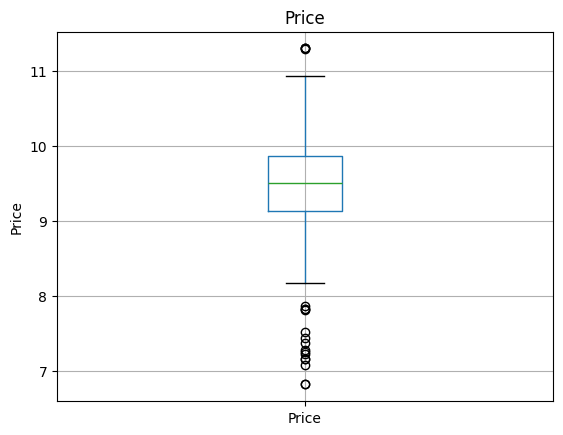

In [585]:
#Removing all the Outliers
for feature in strong_corr:
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df[(df[feature] < q1-1.5*iqr ) | (df[feature] > q3+1.5*iqr)][feature]
    #if df[feature].any()<lower or df[feature].any()>upper:
    df_numerical[feature]=df_numerical[feature].replace(df_numerical[feature].mean())
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
        #df[(df[feature] < Q1-1.5*IQR ) | (df[feature] > Q3+1.5*IQR)][feature]

In [469]:
df_categorical.columns

Index(['Mobile Brand', 'Model Name', 'Colour', 'Processor_'], dtype='object')

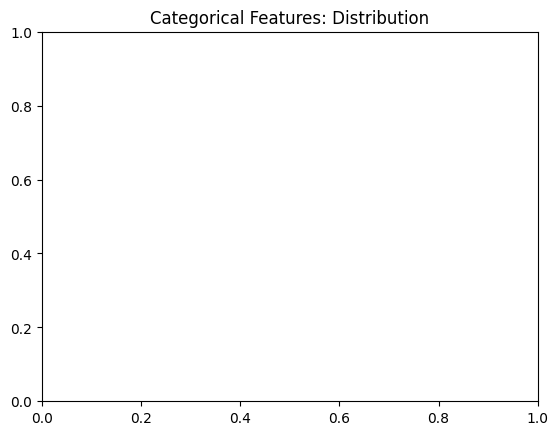

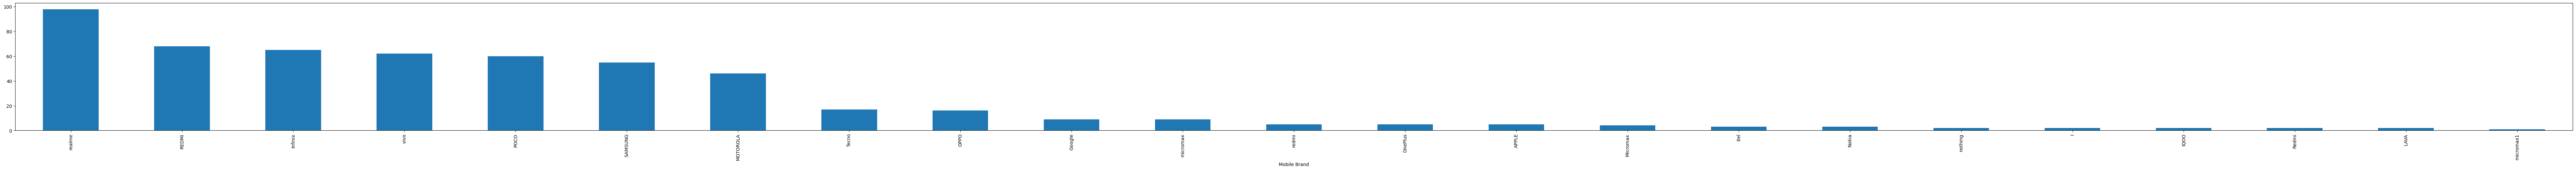

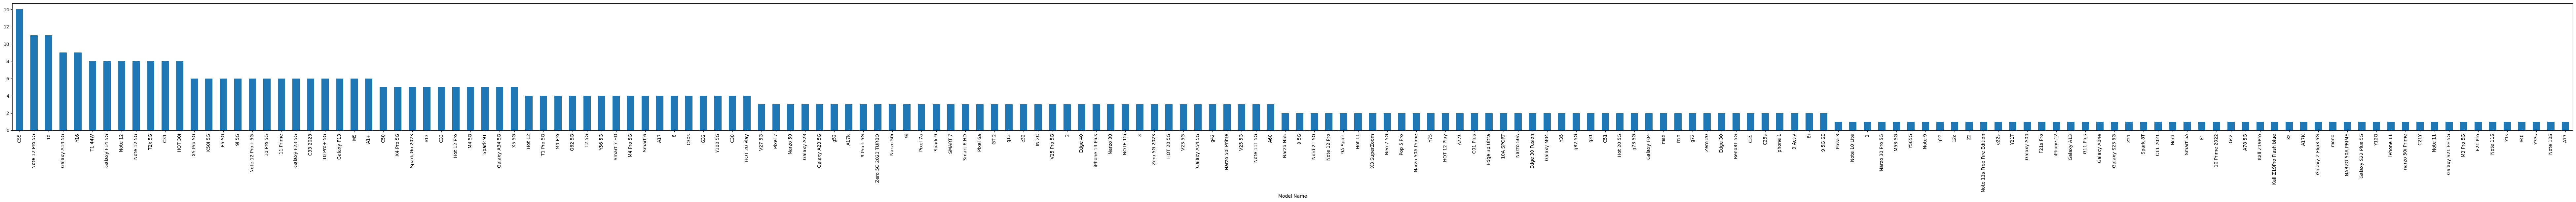

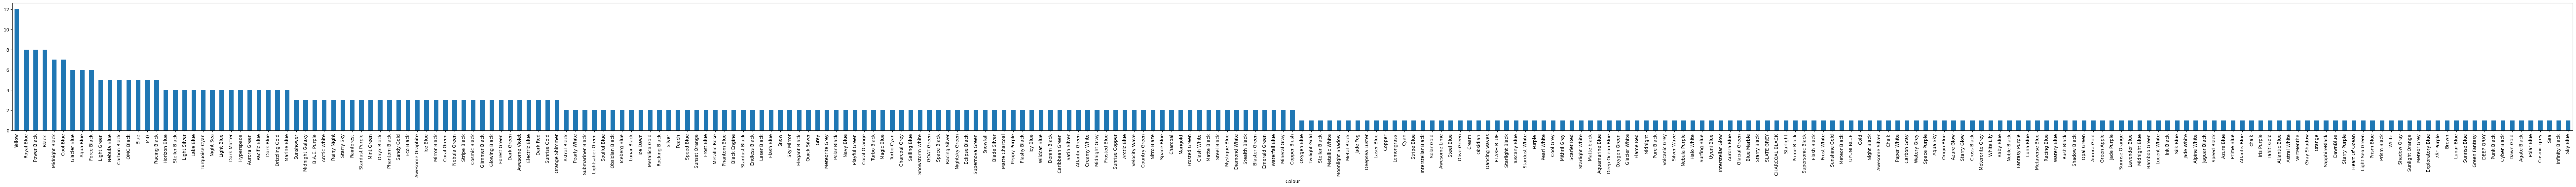

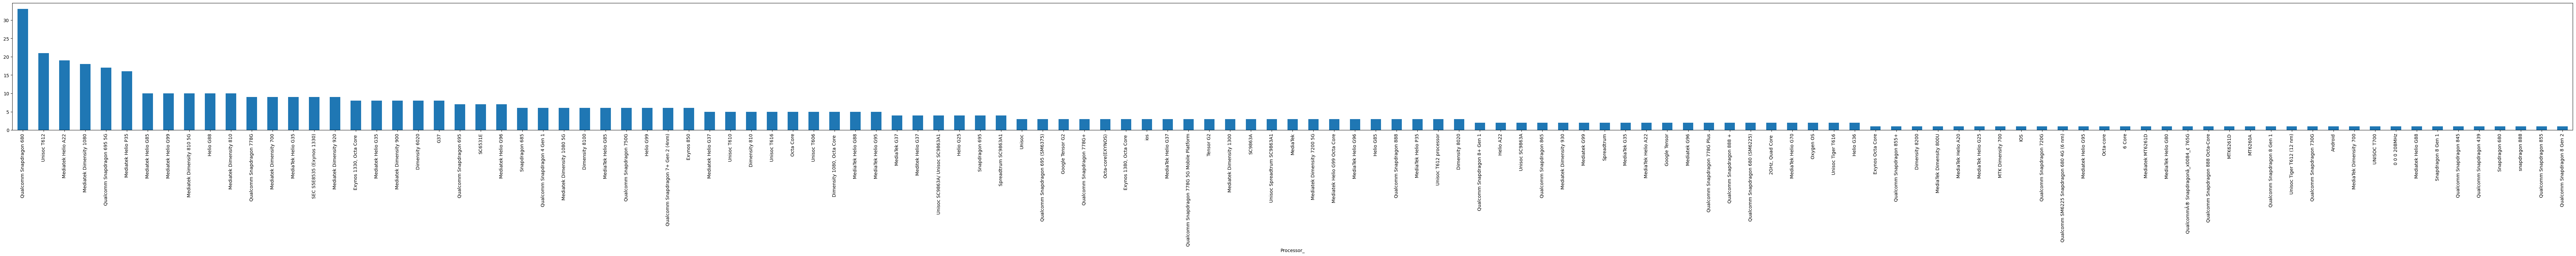

In [477]:
#Plotting the Categorical Features: Distribution
plt.title('Categorical Features: Distribution')
for col in df_categorical:
    plt.figure(figsize=(100,5))
    df_categorical[col].value_counts().plot(kind='bar')
    plt.show()

In [588]:
df_get_dummies = pd.get_dummies(df_categorical)
df_get_dummies

,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [589]:
df_get_dummies=df_get_dummies.applymap(lambda x: 1 if x==True else 0 if x == False else x)
df_get_dummies

C:\Users\DELL\AppData\Local\Temp\ipykernel_11976\1399311975.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_get_dummies=df_get_dummies.applymap(lambda x: 1 if x==True else 0 if x == False else x)


,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [590]:
df_get_dummies.shape

(541, 585)

In [591]:
df1=df_numerical.join(df_get_dummies)

In [592]:
df1.shape

(541, 593)

In [593]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 593 entries, Memory to Processor__snapdragon 888
dtypes: float64(2), int32(2), int64(589)
memory usage: 2.4 MB


In [594]:
df1.isnull().sum().sum()

0

In [607]:
X=df1.drop(["Price"],axis=1)
y=df1["Price"]

In [608]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [609]:
#Split the training set into 
# training and validation set
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,train_size=0.8,test_size=0.2,random_state=42)

In [610]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [611]:
#Fitting the X and Y training data in LinearRegression Model
reg.fit(X_train,y_train)

LinearRegression()

In [613]:
#Checking Co-Efficient
coeff_df = pd.DataFrame(reg.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Memory,2.152682e-01
RAM,1.371544e-01
Battery_,-4.176325e+10
Rear Camera MP,5.906804e-01
Front Camera MP,-2.110105e-01
...,...
Processor__Unisoc T616,3.180069e+11
Processor__Unisoc Tiger T612 (12 nm),1.558934e+12
Processor__Unisoc Tiger T616,-4.915316e+11
Processor__ios,6.513658e+11


In [614]:
#Predicting Values
y_predn = reg.predict(X_test)

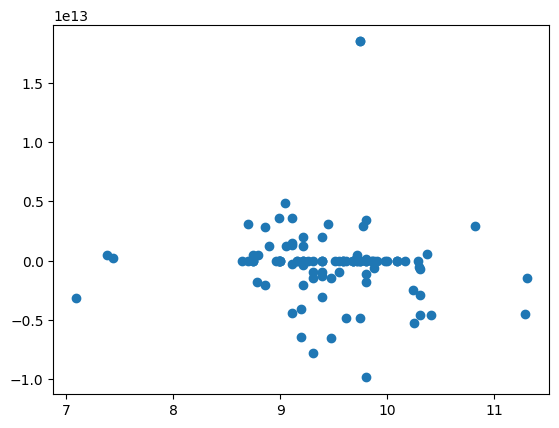

In [615]:
#Plotting the Y  test data to the Y  Prediction data 
plt.scatter(y_test,y_predn)

In [616]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear Regression R^2 Score: ", lr.score(X_train, y_train))
print("Linear Regression Test R^2 Score: ", lr.score(X_test, y_test))
y_pred = lr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(lr, X_test, y_test, cv=5))

Linear Regression R^2 Score:  0.9976985115390811
Linear Regression Test R^2 Score:  -2.9212969134786346e+25
Mean Squared Error:  1.1720634448746562e+25
Mean Absolute Error:  1644600810695.7202
Cross Validation Score:  [-5.60550573e+23 -6.92730826e+25 -3.43781915e+25 -5.04665894e+23
 -1.44347164e+25]


In [619]:
#Alternate Method to find the accuracy of the models by developing a function
models = [RandomForestRegressor(n_estimators=1000),GradientBoostingRegressor(n_estimators=1000)]
def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X_norm, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2)
        print("Cross Validation Accuracies for the", model, '=', cv_score)
        print("Accuracy Score Of the ", model,'=',mean_accuracy,'%')
        print('-----------------------------------------------------------------------------------------------')

In [620]:
compare_models_cross_validation()

Cross Validation Accuracies for the RandomForestRegressor(n_estimators=1000) = [0.84318128 0.93960584 0.9266349  0.80347475 0.75322485]
Accuracy Score Of the  RandomForestRegressor(n_estimators=1000) = 85.32 %
-----------------------------------------------------------------------------------------------
Cross Validation Accuracies for the GradientBoostingRegressor(n_estimators=1000) = [0.87700175 0.96133472 0.92407896 0.8132227  0.653527  ]
Accuracy Score Of the  GradientBoostingRegressor(n_estimators=1000) = 84.58 %
-----------------------------------------------------------------------------------------------


**SO RandomForestRegressor is having Highest Accurracy of 85.32%**